# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

In [1]:
from_this = '''- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.
'''

Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

## 0. Data loading

In [2]:
# подключить необходимые библиотеки

from my_functions import knn_HW_functions
from my_functions import Model


In [3]:
# считать данные

df = knn_HW_functions.get_my_df(from_this)
print(df.shape)
df.head()

(15523, 12)


,id_client,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loan_num_total,loan_num_closed
0,106809321.0,62246916.0,0.0,42.0,2.0,1.0,0.0,0.0,0.0,20000.0,1,0
1,106815561.0,67011502.0,0.0,24.0,2.0,1.0,1.0,0.0,0.0,14000.0,1,1
2,106811521.0,63918955.0,0.0,28.0,2.0,1.0,0.0,0.0,0.0,15000.0,1,0
3,106811252.0,63633352.0,0.0,33.0,2.0,1.0,0.0,0.0,0.0,20000.0,1,1
4,106808620.0,62024377.0,0.0,47.0,2.0,1.0,1.0,2.0,0.0,25000.0,1,0


## 1. Data Preparation

In [4]:
df_data_prep = df.copy().drop('id_client', axis=1)

In [5]:
df_data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agreement_rk       15523 non-null  float64
 1   target             15523 non-null  float64
 2   age                15523 non-null  float64
 3   socstatus_work_fl  15523 non-null  float64
 4   socstatus_pens_fl  15523 non-null  float64
 5   gender             15523 non-null  float64
 6   child_total        15523 non-null  float64
 7   dependants         15523 non-null  float64
 8   personal_income    15523 non-null  float64
 9   loan_num_total     15523 non-null  int64  
 10  loan_num_closed    15523 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.3 MB


Признаков с нулевыми значениями нет, поэтому проверим и удалим дубликаты.

In [6]:
df_data_prep = df_data_prep.drop_duplicates()
df_data_prep.shape

(15223, 11)

Посмотрим, нет ли в значениях какой-нибудь лабуды.

In [7]:
df_data_prep.describe()

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loan_num_total,loan_num_closed
count,1.522300e+04,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,6.540183e+07,0.119030,40.406096,1.909610,1.134468,0.654536,1.099389,0.645208,13853.836323,1.387769,0.751889
std,4.568181e+06,0.323835,11.601068,0.286748,0.341165,0.475535,0.995411,0.812252,9015.467617,0.793566,0.988499
min,5.991015e+07,0.000000,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000
25%,6.192092e+07,0.000000,30.000000,2.000000,1.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,0.000000
50%,6.437100e+07,0.000000,39.000000,2.000000,1.000000,1.000000,1.000000,0.000000,12000.000000,1.000000,0.000000
75%,6.708802e+07,0.000000,50.000000,2.000000,1.000000,1.000000,2.000000,1.000000,17000.000000,2.000000,1.000000
max,7.529224e+07,1.000000,67.000000,2.000000,2.000000,1.000000,10.000000,7.000000,250000.000000,11.000000,11.000000


Вроде, всё норм.

## 3. Feature engineering

### 3.1. General

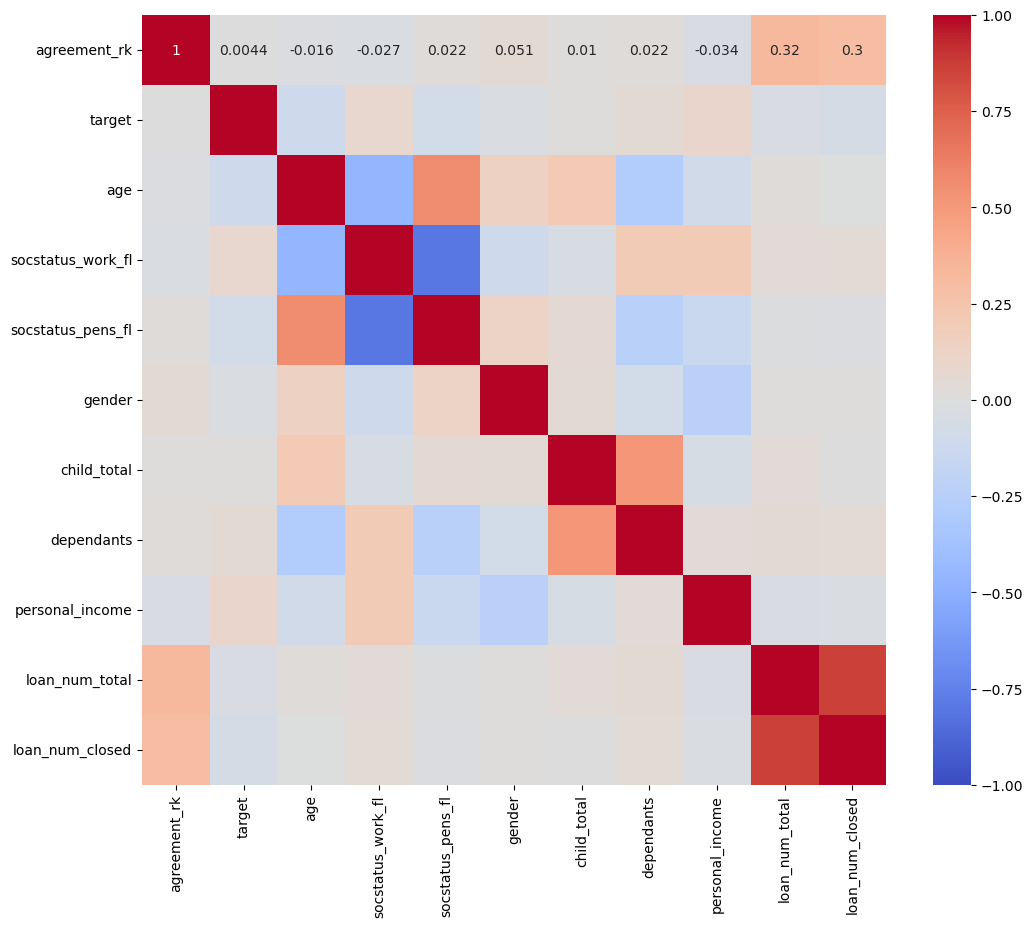

In [8]:
knn_HW_functions.show_corr_matrix(df_data_prep)

Сильная корреляция: пложительная наблюдается лишь между признаками loan_num_total и loan_num_closed, отрицательная — между рабочими статусами. 

Средняя степень корреляции: положительная между детьми и иждивенцами (т.к. класс иждивенцев включает в себя детей), отрицательная — между возрастом и статусом пенсионера, что закономерно.

Остальные — "не пришей пизде рукав" или, другими словами, не обнаружили какой-либо заметной корреляции. 

Посмотрим на зависимость признаков от таргета.

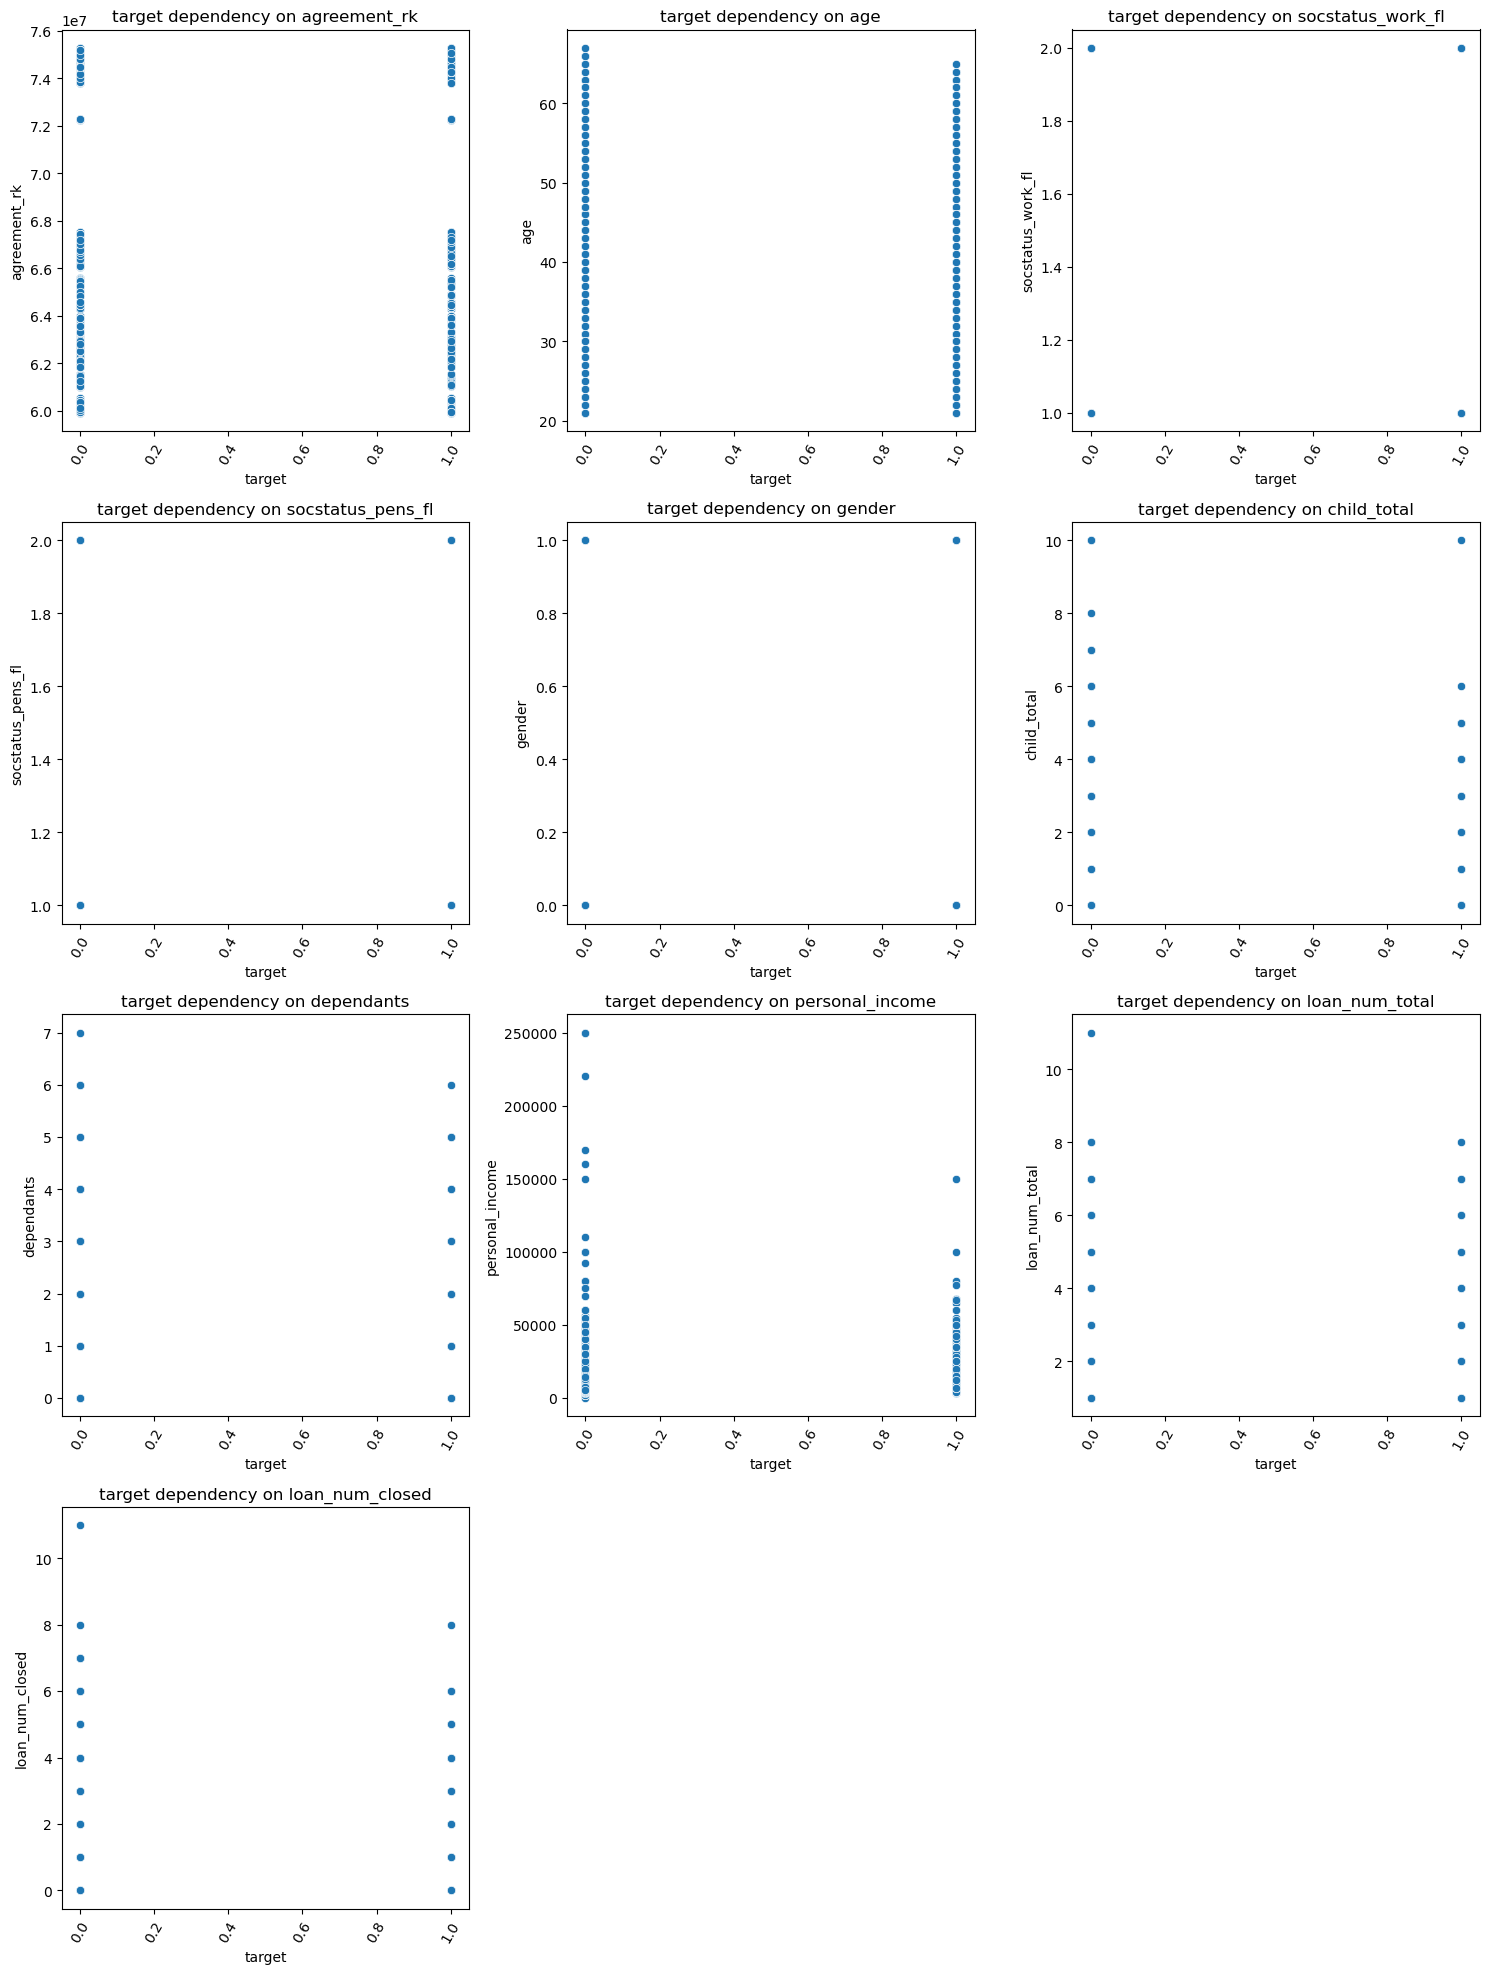

In [9]:
knn_HW_functions.multiple_scatter_plot(df_data_prep, 'target')

![and where's the description](media/i_dont_fuckin_get_it.gif)

Ни черта не понятно.


### 3.2. Creating new features

In [10]:
df_feat_eng = knn_HW_functions.engineer_features(df_data_prep)
df_feat_eng.head()

,target,age,gender,child_total,personal_income,age_gender_group,financial_burden,has_dependants_or_children,income_per_dependant,loan_closed_ratio,total_responsibility,work_status
0,0.0,42.0,0.0,0.0,20000.0,4.0,0.000050,False,20000.0,0.0,0.0,4.0
1,0.0,24.0,1.0,0.0,14000.0,12.0,0.000071,False,14000.0,1.0,0.0,4.0
2,0.0,28.0,0.0,0.0,15000.0,2.0,0.000067,False,15000.0,0.0,0.0,4.0
3,0.0,33.0,0.0,0.0,20000.0,3.0,0.000050,False,20000.0,1.0,0.0,4.0
4,0.0,47.0,1.0,2.0,25000.0,14.0,0.000040,False,25000.0,0.0,2.0,4.0


# 4. Modeling

Подготовим два датасета к моделированию: один без новых признаков, другой — с новыми признаками, чтобы иметь возможность проверить, надо ли было формировать новые признаки или я опять тут два дня на ветер пустил.

precision:
	train: 55.56%,	test: 38.10%
recall:
	train: 2.00%,	test: 1.43%
f1:
	train: 3.86%,	test: 2.75%

Confusion matrix on test:



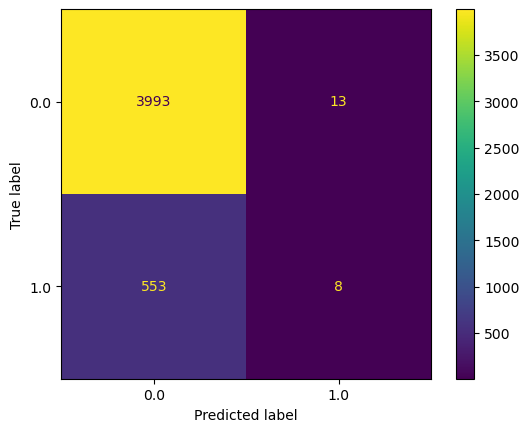

In [11]:
base_model_values = Model.get_model_values(df_data_prep)
base_model_values

precision:
	train: 60.42%,	test: 31.25%
recall:
	train: 2.32%,	test: 0.89%
f1:
	train: 4.46%,	test: 1.73%

Confusion matrix on test:



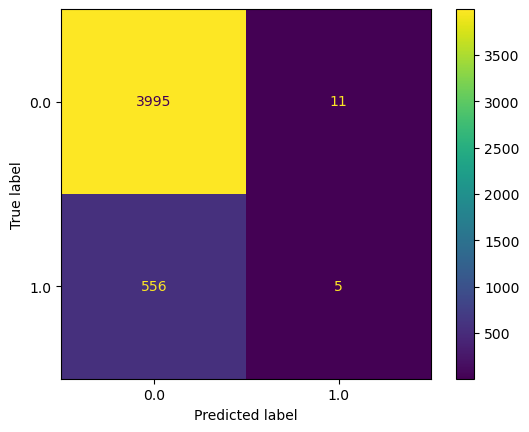

In [12]:
engineered_model_values = Model.get_model_values(df_feat_eng)
engineered_model_values

# Тут выводы спрашивают...

Ну что я могу сказать? Метод "пальцем в небо" работает лучше, чем получившаяся у меня модель. 

Либо надо какую-то другую метрику или модель использовать.